In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import norm, kurtosis
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', 1000)

C:\Users\champ\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_data = pd.read_csv("train_avm.csv")
test_data = pd.read_csv("test_avm.csv")

In [3]:
def cal_null_number(data):
    total_data_number  = len(data)
    df_null_number = data.isnull().sum()
    df_null_number = df_null_number.loc[df_null_number>0]
    df_null_number = pd.DataFrame(df_null_number.sort_values(ascending=False).reset_index())
    df_null_number.columns = ['feature_name','null_total_number']
    df_null_number['null_ratio'] = round(df_null_number['null_total_number'] / total_data_number,5)
    return df_null_number

def plot_count_barplot(data, feature_name):
    a = data[feature_name].value_counts().sort_values(ascending=False)
    a = a.reset_index()
    a = a.rename(columns={'index':feature_name, feature_name:'data number'})
    sns.barplot(x=feature_name, y='data number', data=a)

In [4]:
train_data.head()

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,txn_floor,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,doc_Rate,master_rate,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_date,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,I_10,I_50,I_100,I_250,I_500,I_1000,I_MIN,II_10,II_50,II_100,II_250,II_500,II_1000,II_MIN,III_10,III_50,III_100,III_250,III_500,III_1000,III_MIN,IV_10,IV_50,IV_100,IV_250,IV_500,IV_1000,IV_MIN,V_10,V_50,V_100,V_250,V_500,V_1000,V_MIN,VI_10,VI_50,VI_100,VI_250,VI_500,VI_1000,VI_MIN,VII_10,VII_50,VII_100,VII_250,VII_500,VII_1000,VII_MIN,VIII_10,VIII_50,VIII_100,VIII_250,VIII_500,VIII_1000,VIII_MIN,IX_10,IX_50,IX_100,IX_250,IX_500,IX_1000,IX_MIN,X_10,X_50,X_100,X_250,X_500,X_1000,X_MIN,XI_10,XI_50,XI_100,XI_250,XI_500,XI_1000,XI_MIN,XII_10,XII_50,XII_100,XII_250,XII_500,XII_1000,XII_MIN,XIII_10,XIII_50,XIII_100,XIII_250,XIII_500,XIII_1000,XIII_MIN,XIV_10,XIV_50,XIV_100,XIV_250,XIV_500,XIV_1000,XIV_MIN,total_price
0,ucIR2NLLsC3T650L,8,7,19289,4,1,2,6028,2,NaN,NaN,1.0,21.426802,5.584279,180,-37.67,119.29,625.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1544,4,14,14,0,0,1,1,8,39,82.676961,0,0,0,5,18,132,110.761328,0,0,1,17,73,235,86.589412,0,0,4,10,28,44,62.428191,0,0,1,7,31,143,58.042563,0,1,1,2,6,10,29.607781,0,1,5,34,131,532,40.439890,0,2,7,47,139,399,32.523085,0,0,2,8,36,116,75.268914,0,0,0,5,18,67,108.270812,0,0,0,3,13,50,164.052330,0,1,12,49,186,736,35.796546,0,0,0,2,6,29,174.954657,0,0,2,27,78,212,54.462081,9.570885e+06
1,jre1pJhcQj91Kdky,8,21,20385,24,0,2,18325,0,NaN,81138.889762,13.0,11.387227,13.563031,343,-39.13,117.09,950.0,139259.0,14.7523,9440.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3350,4,11,13,0,0,0,0,0,9,590.458945,0,0,0,0,7,31,279.365544,0,1,1,3,5,50,45.508654,0,0,0,0,0,1,982.352700,0,0,0,0,2,14,423.658555,0,0,0,0,1,5,421.260244,0,0,0,10,31,101,157.922588,0,0,1,4,21,78,73.978254,0,1,1,3,12,33,47.969413,0,1,2,5,11,47,42.380415,0,0,0,0,3,40,283.620244,0,1,2,7,32,124,43.654182,0,0,0,0,0,0,1247.796459,0,0,1,2,20,125,99.628966,1.421501e+07
2,rQpYpY9nRG7X5mmr,1,21,20657,2,4,2,6880,2,NaN,NaN,NaN,61.306524,4.688108,102,-39.24,117.19,536.0,112397.0,71.0400,1582.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,63,1,4,9,0,0,0,0,0,1,603.643541,0,1,1,1,1,2,19.028439,0,0,0,0,0,1,546.047664,0,0,0,0,0,0,1435.928054,0,0,0,0,0,2,689.539284,0,0,0,0,0,0,2727.723917,0,0,0,0,0,3,669.730617,0,0,0,0,1,2,332.171857,0,0,0,0,0,0,1354.750025,0,0,0,0,0,0,1165.273099,0,0,0,0,0,1,607.948642,0,0,0,5,9,13,124.956094,0,0,0,0,0,0,1766.374491,0,0,0,2,18,47,124.131236,7.627120e+05
3,ITYyim3zx6DQyCoF,8,7,20474,15,0,2,16559,0,NaN,61488.568950,8.0,11.387227,7.726227,84,-37.69,119.27,716.0,238067.0,29.5578,8054.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1591,0,12,14,0,0,0,1,1,21,213.091735,0,0,0,3,16,98,205.935244,0,0,1,2,15,139,87.008685,0,0,0,0,0,1,907.720034,0,0,0,2,10,99,118.176289,0,0,0,0,2,4,397.858990,0,0,0,8,29,250,105.563252,0,0,0,4,33,319,118.176289,0,0,1,1,5,68,87.364785,0,0,0,7,9,72,121.375810,0,0,0,4,17,65,134.376535,0,0,3,16,72,447,64.551199,0,0,0,0,0,9,516.835172,0,0,0,1,65,252,196.690224,8.510296e+06
4,QnytA7FbgaVxIDuP,8,7,19927,10,3,2,9863,0,NaN,61488.568950,2.0,11.387227,7.480303,180,-37.67,119.32,604.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,2122,4,13,14,0,0,0,3,10,38,124.443839,0,0,0,7,48,157,159.757485,0,1,2,9,31,201,36.215680,0,0,0,0,1,3,443.618507,0,0,0,6,20,153,144.214039,0,0,0,0,0,2,703.374874,0,1,3,24,96,464,17.805175,0,0,0,16,83,420,144.214039,0,0,0,5,16,120,120.091363,0,0,0,5,17,67,124.950692,1,1,3,7,19,64,6.465746,0,1,8,72,255,975,47.436622,0,0,0,2,3,23,20

# 缺失值

In [14]:
cal_null_number(train_data)

,feature_name,null_total_number,null_ratio
0,parking_area,35863,0.95160
1,parking_price,28959,0.76841
2,txn_floor,10000,0.26534
3,village_income_median,750,0.01990


In [16]:
cal_null_number(test_data)

,feature_name,null_total_number,null_ratio
0,parking_area,6002,0.95255
1,parking_price,4864,0.77194
2,txn_floor,1654,0.26250
3,village_income_median,112,0.01777


# 房價

Text(0.5, 1.05, 'Before take log transformation skew 24.84 kurtosis 945.18')

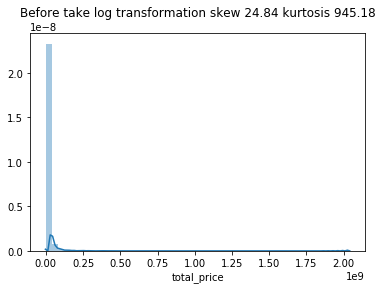

In [167]:
sns.distplot(train_data['total_price'])
skew_ = skew(train_data['total_price'])
kurtosis_ = kurtosis(train_data['total_price'])
plt.title("Before take log transformation skew {:.2f} kurtosis {:.2f}".format(skew_, kurtosis_),y=1.05)

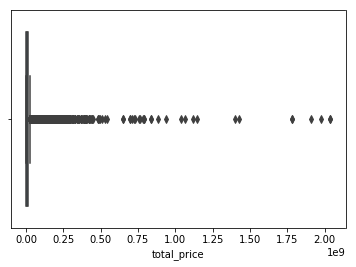

In [116]:
sns.boxplot(train_data['total_price'])

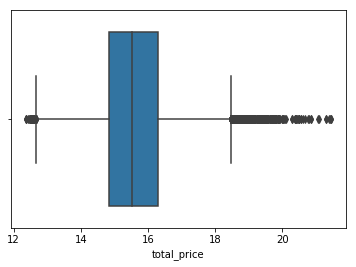

In [117]:
sns.boxplot(train_data['total_price'].apply(lambda x : np.log(x)))

# 取log之後的房價

Text(0.5, 1.0, 'After take log transformation skew 0.35 kurtosis 0.46')

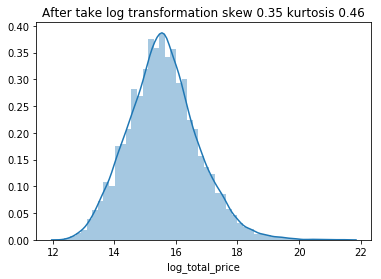

In [168]:
train_data['log_total_price'] = train_data['total_price'].apply(lambda x : np.log(x))
sns.distplot(train_data['log_total_price'])
skew_ = skew(train_data['log_total_price'])
kurtosis_ = kurtosis(train_data['log_total_price'])
plt.title("After take log transformation skew {:.2f} kurtosis {:.2f}".format(skew_, kurtosis_))

# 單位面積總價

In [ ]:
train_data['unit_price'] = train_data['total_price'] / train_data['building_area']
train_data['log_unit_price'] = np.log(train_data['total_price'] / train_data['building_area'])

Text(0.5, 1.05, 'Before take log transformation skew 114.20 kurtosis 18372.96')

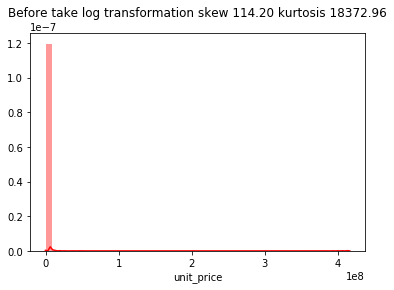

In [146]:
sns.distplot(train_data['unit_price'], color="red")
skew_ = skew(train_data['unit_price'])
kurtosis_ = kurtosis(train_data['unit_price'])
plt.title("Before take log transformation skew {:.2f} kurtosis {:.2f}".format(skew_, kurtosis_),y=1.05)

Text(0.5, 1.0, 'After take log transformation skew 0.10 kurtosis -0.41')

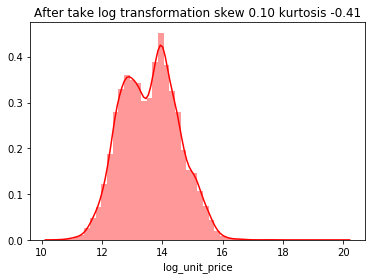

In [147]:
sns.distplot(train_data['log_unit_price'], color="red")
skew_ = skew(train_data['log_unit_price'])
kurtosis_ = kurtosis(train_data['log_unit_price'])
plt.title("After take log transformation skew {:.2f} kurtosis {:.2f}".format(skew_, kurtosis_))

# 總樓層

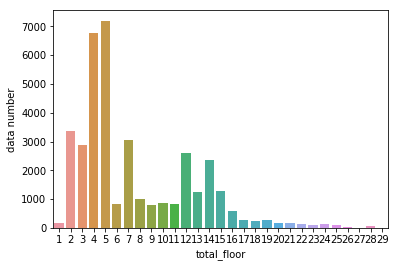

In [49]:
# 整棟大樓五層以下居多
plot_count_barplot(train_data, 'total_floor')

In [37]:
# 總樓層不是決定房價的因素，不同總樓層間價格差很大
train_data.groupby(by="total_floor")['total_price'].mean()

total_floor
1     1.985772e+07
2     8.716044e+06
3     1.130684e+07
4     1.104641e+07
5     1.037804e+07
6     1.406264e+07
7     1.624316e+07
8     9.755157e+06
9     1.226707e+07
10    1.204549e+07
11    1.880278e+07
12    1.366661e+07
13    1.567766e+07
14    1.882269e+07
15    1.657609e+07
16    1.230474e+07
17    1.978723e+07
18    9.969578e+06
19    1.410638e+07
20    1.551925e+07
21    1.594535e+07
22    1.635826e+07
23    1.893234e+07
24    1.870545e+07
25    2.970019e+07
26    8.059096e+07
27    4.650781e+07
28    5.784301e+07
29    1.925858e+07
Name: total_price, dtype: float64

In [38]:
train_data.groupby(by="total_floor")['total_price'].std()

total_floor
1     1.096386e+08
2     3.411124e+07
3     6.252118e+07
4     2.702204e+07
5     4.251592e+07
6     3.382529e+07
7     2.530687e+07
8     1.887414e+07
9     1.940211e+07
10    2.201203e+07
11    5.339679e+07
12    2.862285e+07
13    3.829888e+07
14    5.346724e+07
15    5.065074e+07
16    5.051246e+07
17    1.187852e+08
18    9.846455e+06
19    1.681889e+07
20    1.804810e+07
21    1.914817e+07
22    1.814659e+07
23    2.690308e+07
24    2.109072e+07
25    3.440438e+07
26    1.219267e+08
27    4.278495e+07
28    6.295145e+07
29    7.342078e+06
Name: total_price, dtype: float64

# 交易樓層

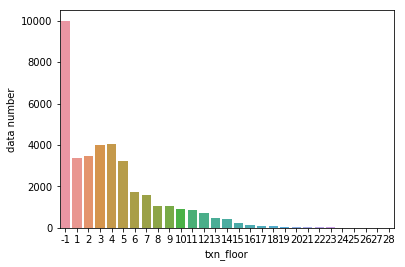

In [25]:
# 缺失值-1的房子占了大部分，但價格平均很低
train_data['txn_floor'] = train_data['txn_floor'].fillna(-1).apply(lambda x : int(x))
plot_count_barplot(train_data, 'txn_floor')

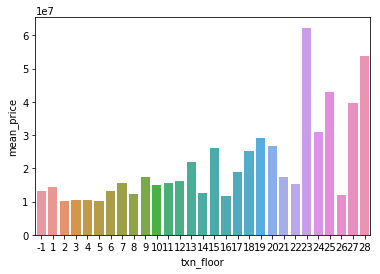

In [26]:
# 用平均值看不好，因為資料標準差過大
a = train_data.groupby(by="txn_floor")['total_price'].mean()
a = a.reset_index()
a = a.rename(columns={'total_price':'mean_price'})
sns.barplot('txn_floor', 'mean_price', data=a)

ValueError: Could not interpret input 'log_total_price'

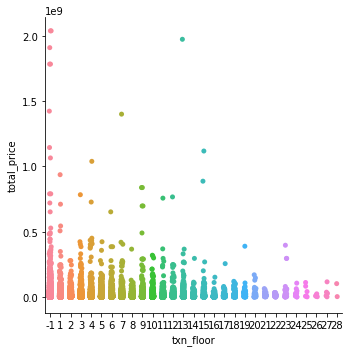

In [27]:
sns.catplot(x="txn_floor", y="total_price", data=train_data)
sns.catplot(x="txn_floor", y="log_total_price", data=train_data)

In [ ]:
a = train_data.loc[train_data['txn_floor']==-1, 'total_floor'].value_counts()
a = a.reset_index()
a = a.rename(columns={'index':'total_floor', 'total_floor':'transaction number'})
sns.barplot(x='total_floor', y="transaction number",data=a)

In [31]:
train_data.loc[train_data['txn_floor']==-1, 'building_type'].value_counts()

4    10000
Name: building_type, dtype: int64

# 交易日期

Text(0, 0.5, 'total_price')

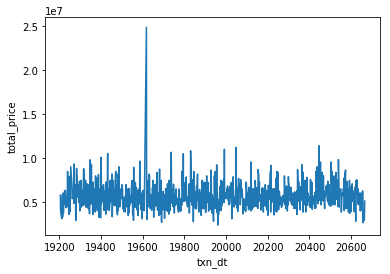

In [15]:
plt.plot(train_data.groupby(by='txn_dt')['total_price'].median())
plt.xlabel('txn_dt')
plt.ylabel('total_price')

In [59]:
# 星期幾
train_data['weekday'] = train_data['txn_dt'] % 7

0    7903
6    7670
5    7599
4    7270
1    7010
2     234
3       1
Name: txn_dt, dtype: int64

In [16]:
# 幾月
train_data['month'] = (train_data['txn_dt'] % 365 / 30.4167).apply(lambda x:np.floor(x))

Text(0, 0.5, 'month median price')

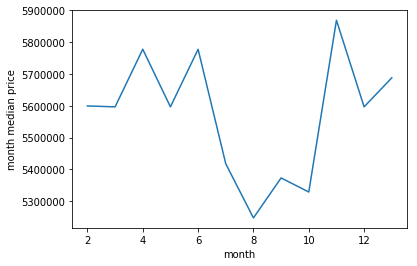

In [21]:
train_data['month'] = train_data['month'] + 1
plt.plot(train_data.groupby('month')['total_price'].median())
plt.xlabel('month')
plt.ylabel('month median price')

In [72]:
# 季度
train_data['quarter'] = (train_data['txn_dt'] % 365 / 91.25).apply(lambda x:np.floor(x))

# 建物完成日期

In [84]:
train_data['building_complete_dt']

0         6028
1        18325
2         6880
3        16559
4         9863
         ...  
37682     3988
37683    17168
37684    13729
37685     7063
37686     8310
Name: building_complete_dt, Length: 37687, dtype: int64

# 屋齡

In [125]:
train_data['house_year'] = (train_data['txn_dt'] - train_data['building_complete_dt'])/365

In [131]:
np.corrcoef(train_data['house_year'], train_data['total_price'])

array([[ 1.        , -0.08087467],
       [-0.08087467,  1.        ]])

In [134]:
sns.barplot(x="house_year", y="log_total_price", data=train_data)

KeyboardInterrupt: 

# 建材

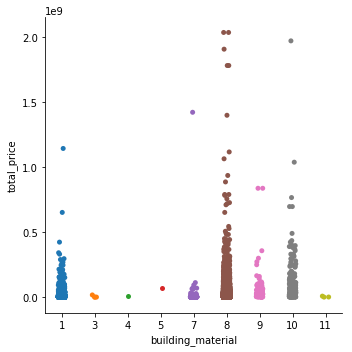

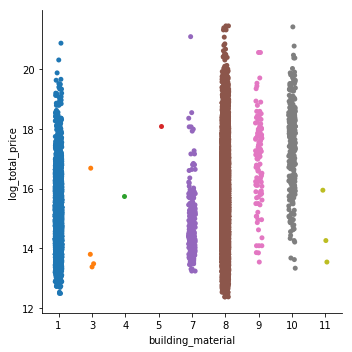

In [98]:
sns.catplot(x="building_material", y="total_price", data=train_data)
sns.catplot(x="building_material", y="log_total_price", data=train_data)

# 縣市

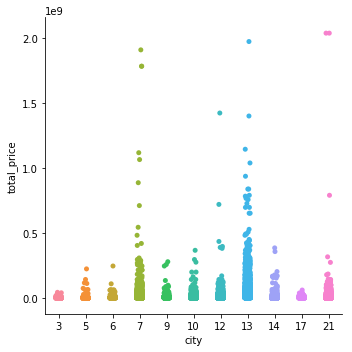

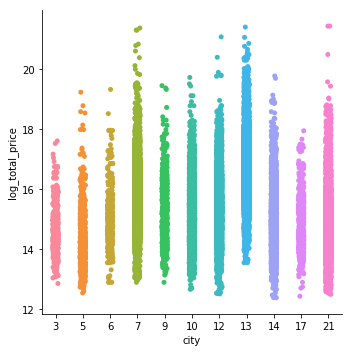

In [99]:
sns.catplot(x="city", y="total_price", data=train_data)
sns.catplot(x="city", y="log_total_price", data=train_data)

# 鄉鎮市區

<Figure size 7200x576 with 0 Axes>

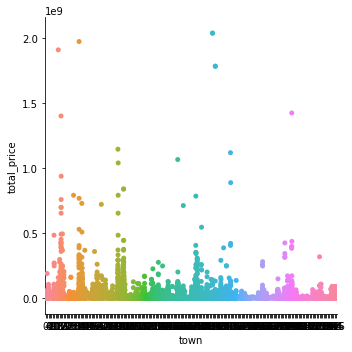

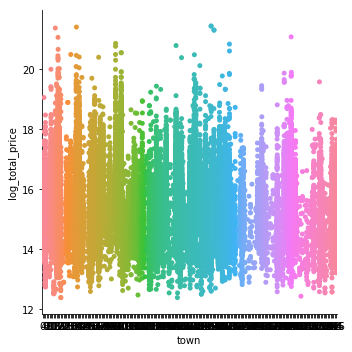

In [103]:
sns.catplot(x="town", y="total_price", data=train_data)
sns.catplot(x="town", y="log_total_price", data=train_data)

# 村里

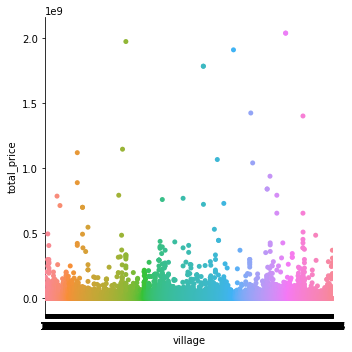

Error in callback <function flush_figures at 0x0000028E386B6D08> (for post_execute):


KeyboardInterrupt: 

In [104]:
sns.catplot(x="village", y="total_price", data=train_data)
sns.catplot(x="village", y="log_total_price", data=train_data)

# 建物型態

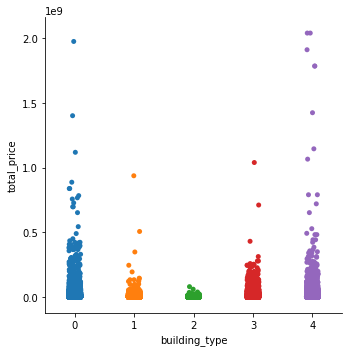

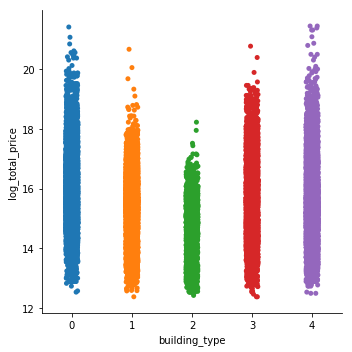

In [105]:
sns.catplot(x="building_type", y="total_price", data=train_data)
sns.catplot(x="building_type", y="log_total_price", data=train_data)

# 建物用途

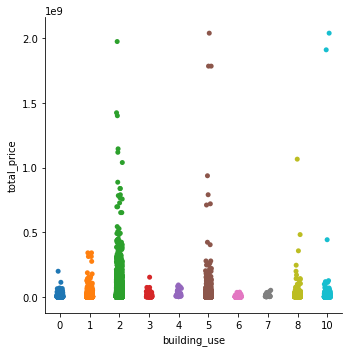

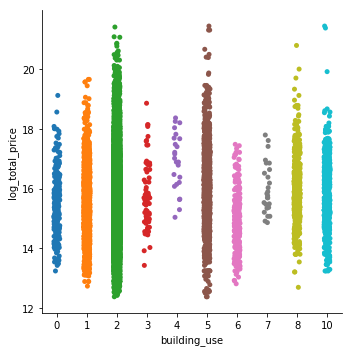

In [71]:
sns.catplot(x="building_use", y="total_price", data=train_data)
sns.catplot(x="building_use", y="log_total_price", data=train_data)

# 車位停放方式

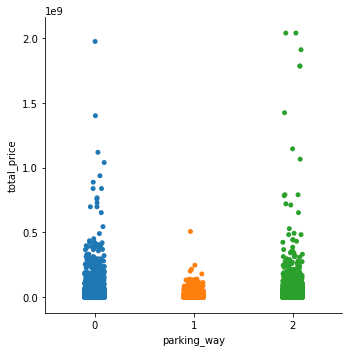

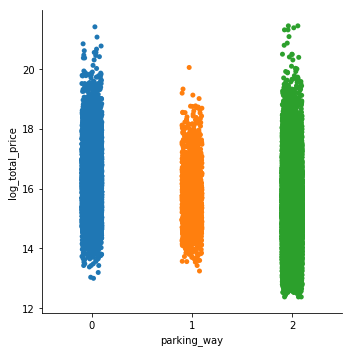

In [107]:
sns.catplot(x="parking_way", y="total_price", data=train_data)
sns.catplot(x="parking_way", y="log_total_price", data=train_data)

# 車位面積

In [37]:
# 有停車價格沒有停車位面積 而且沒有人和他們同一棟
a = train_data.loc[(train_data['parking_price'].notnull())&(train_data['parking_area'].isnull())]
for index, row in a.iterrows():
    if len(train_data.loc[train_data['building_id']==row['building_id']]) > 1:
        print(True)

In [45]:
# 有四筆parking area為0
not_null['averge_area_parking_price'] = not_null['parking_area'] / not_null['parking_price']

C:\Users\champ\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
train_data.loc[(train_data['parking_price'].notnull())&(train_data['parking_area'].isnull())]

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,txn_floor,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,doc_Rate,master_rate,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_date,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,I_10,I_50,I_100,I_250,I_500,I_1000,I_MIN,II_10,II_50,II_100,II_250,II_500,II_1000,II_MIN,III_10,III_50,III_100,III_250,III_500,III_1000,III_MIN,IV_10,IV_50,IV_100,IV_250,IV_500,IV_1000,IV_MIN,V_10,V_50,V_100,V_250,V_500,V_1000,V_MIN,VI_10,VI_50,VI_100,VI_250,VI_500,VI_1000,VI_MIN,VII_10,VII_50,VII_100,VII_250,VII_500,VII_1000,VII_MIN,VIII_10,VIII_50,VIII_100,VIII_250,VIII_500,VIII_1000,VIII_MIN,IX_10,IX_50,IX_100,IX_250,IX_500,IX_1000,IX_MIN,X_10,X_50,X_100,X_250,X_500,X_1000,X_MIN,XI_10,XI_50,XI_100,XI_250,XI_500,XI_1000,XI_MIN,XII_10,XII_50,XII_100,XII_250,XII_500,XII_1000,XII_MIN,XIII_10,XIII_50,XIII_100,XIII_250,XIII_500,XIII_1000,XIII_MIN,XIV_10,XIV_50,XIV_100,XIV_250,XIV_500,XIV_1000,XIV_MIN,total_price
1,jre1pJhcQj91Kdky,8,21,20385,24,0,2,18325,0,NaN,81138.889762,13.0,11.387227,13.563031,343,-39.13,117.09,950.0,139259.0,14.7523,9440.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3350,4,11,13,0,0,0,0,0,9,590.458945,0,0,0,0,7,31,279.365544,0,1,1,3,5,50,45.508654,0,0,0,0,0,1,982.352700,0,0,0,0,2,14,423.658555,0,0,0,0,1,5,421.260244,0,0,0,10,31,101,157.922588,0,0,1,4,21,78,73.978254,0,1,1,3,12,33,47.969413,0,1,2,5,11,47,42.380415,0,0,0,0,3,40,283.620244,0,1,2,7,32,124,43.654182,0,0,0,0,0,0,1247.796459,0,0,1,2,20,125,99.628966,1.421501e+07
3,ITYyim3zx6DQyCoF,8,7,20474,15,0,2,16559,0,NaN,61488.568950,8.0,11.387227,7.726227,84,-37.69,119.27,716.0,238067.0,29.5578,8054.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1591,0,12,14,0,0,0,1,1,21,213.091735,0,0,0,3,16,98,205.935244,0,0,1,2,15,139,87.008685,0,0,0,0,0,1,907.720034,0,0,0,2,10,99,118.176289,0,0,0,0,2,4,397.858990,0,0,0,8,29,250,105.563252,0,0,0,4,33,319,118.176289,0,0,1,1,5,68,87.364785,0,0,0,7,9,72,121.375810,0,0,0,4,17,65,134.376535,0,0,3,16,72,447,64.551199,0,0,0,0,0,9,516.835172,0,0,0,1,65,252,196.690224,8.510296e+06
4,QnytA7FbgaVxIDuP,8,7,19927,10,3,2,9863,0,NaN,61488.568950,2.0,11.387227,7.480303,180,-37.67,119.32,604.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,2122,4,13,14,0,0,0,3,10,38,124.443839,0,0,0,7,48,157,159.757485,0,1,2,9,31,201,36.215680,0,0,0,0,1,3,443.618507,0,0,0,6,20,153,144.214039,0,0,0,0,0,2,703.374874,0,1,3,24,96,464,17.805175,0,0,0,16,83,420,144.214039,0,0,0,5,16,120,120.091363,0,0,0,5,17,67,124.950692,1,1,3,7,19,64,6.465746,0,1,8,72,255,975,47.436622,0,0,0,2,3,23,207.218133,0,0,0,19,118,288,102.955013,1.181540e+07
10,ISuDDnGeZIyKtuA2,8,7,20039,5,1,2,13576,0,NaN,67830.664907,5.0,19.792205,10.548362,180,-37.68,119.30,678.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,725,2,14,14,0,0,1,1,12,63,76.685648,0,0,1,12,55,202,99.958138,0,0,1,14,66,309,76.365984,0,0,0,1,6,31,196.480670,0,0,0,5,32,213,142.459553,0,0,0,1,2,11,202.849689,0,0,1,14,118,685,76.685648,0,1,2,15,85,713,46.055582,0,0,0,2,22,212,126.154579,0,0,0,4,15,79,153.859313,0,0,1,5,24,100,89.839160,0,0,6,59,265,955,73.560703,0,1,1,5,16,35,30.301126,0,0,0,13,46,363,167.522962,1.360112e+07
13,ohfH2g5ymt8QilFL,8,7,20126,10,3,2,16620,0,NaN,49461.515554,8.0,6.051717,5.584279,211,-37.62,119.29,844.0,78911.0,19.1603,4118.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,387,7,13,14,0,0,2,4,9,18,64.421351,0,3,7,15,46,65,41.783605,0,3,7,18,38,82,37.030075,0,0,0,1,2,3,203.777514,0,1,4,11,20,49,24.565293,0,0,0,0,0,2,788.060779,0,2,8,33,74,141,25.269651,0,9,19,46,84,168,14.921288,0,1,2,3,19,30,39.311302,0,0,0,5,13,37,122.297709,0,0,2,5,20,47,62.1389

# 車位價格

Text(0.5, 1.05, 'Before take log transformation skew 4.38 kurtosis 48.55')

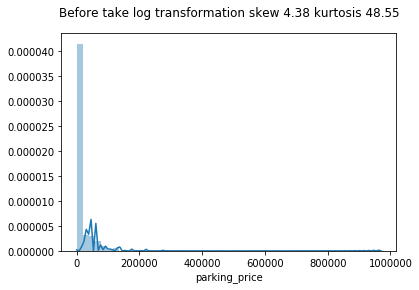

In [15]:
train_data['parking_price'] = train_data['parking_price'].fillna(0)
sns.distplot(train_data['parking_price'])
skew_ = skew(train_data['parking_price'])
kurtosis_ = kurtosis(train_data['parking_price'])
plt.title("Before take log transformation skew {:.2f} kurtosis {:.2f}".format(skew_, kurtosis_),y=1.05)

Text(0.5, 1.0, 'After take log transformation skew 1.30 kurtosis -0.29')

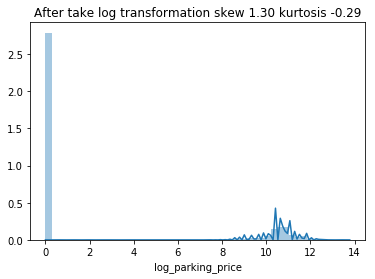

In [21]:
train_data['log_parking_price'] = train_data['parking_price'].apply(lambda x : np.log(x))
train_data['log_parking_price'] = train_data['log_parking_price'].replace([np.inf, -np.inf], 0)
sns.distplot(train_data['log_parking_price'])
skew_ = skew(train_data['log_parking_price'])
kurtosis_ = kurtosis(train_data['log_parking_price'])
plt.title("After take log transformation skew {:.2f} kurtosis {:.2f}".format(skew_, kurtosis_))

In [46]:
train_data['parking_area'] = train_data['parking_area'].fillna('NaN')
train_data.loc[train_data['parking_price'].isnull(), 'parking_area'].count()

28959

In [47]:
pd.DataFrame({'parking_area_null_number':[28959], 'parking_price_null_number':[28959],'ratio':[1]})

,parking_area_null_number,parking_price_null_number,ratio
0,28959,28959,1


In [50]:
train_data.loc[train_data['parking_way']==2, 'parking_price'].value_counts()

Series([], Name: parking_price, dtype: int64)

# 土地面積

Text(0.5, 1.05, 'Before take log transformation skew 32.56 kurtosis 2336.62')

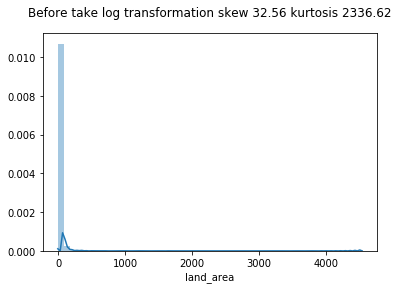

In [54]:
sns.distplot(train_data['land_area'])
skew_ = skew(train_data['land_area'])
kurtosis_ = kurtosis(train_data['land_area'])
plt.title("Before take log transformation skew {:.2f} kurtosis {:.2f}".format(skew_, kurtosis_),y=1.05)

Text(0.5, 1.05, 'Before take log transformation skew 0.30 kurtosis 0.66')

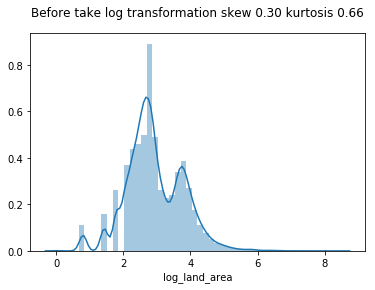

In [65]:
# 轉換log加入模型沒差
train_data['log_land_area'] = train_data['land_area'].apply(lambda x : np.log(x))
train_data['log_land_area'] = train_data['log_land_area'].replace([np.inf, -np.inf], 0)
sns.distplot(train_data['log_land_area'])
skew_ = skew(train_data['log_land_area'])
kurtosis_ = kurtosis(train_data['log_land_area'])
plt.title("Before take log transformation skew {:.2f} kurtosis {:.2f}".format(skew_, kurtosis_),y=1.05)

In [114]:
log_feature = np.log(train_data['land_area']).replace([np.inf, -np.inf], 0)
feature_mean = log_feature.mean()
feature_std = log_feature.std()
train_data['standard_outlier'] = (log_feature - feature_mean) / feature_std
drop_index = train_data.loc[(train_data['standard_outlier']>3)|(train_data['standard_outlier']<-3)].index
print('Need Drop index number:', len(drop_index))

Need Drop index number: 197


C:\Users\champ\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


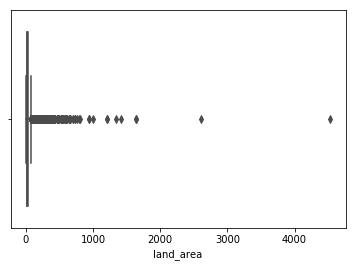

In [121]:
sns.boxplot(train_data['land_area'],  color='red')

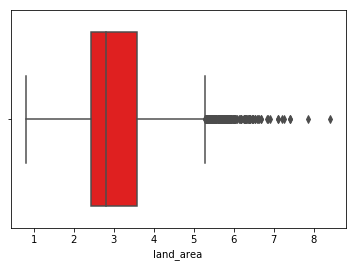

In [120]:
sns.boxplot(train_data['land_area'].apply(lambda x : np.log(x)), color='red')

# 建物面積

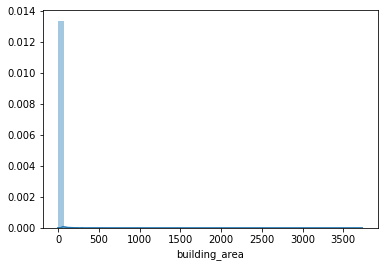

In [66]:
#建物面積包含車位面積，土地面積則不包含
sns.distplot(train_data['building_area'])

In [101]:
log_feature = np.log(train_data['building_area'])
feature_mean = log_feature.mean()
feature_std = log_feature.std()
train_data['standard_outlier'] = (log_feature - feature_mean) / feature_std
drop_index = train_data.loc[(train_data['standard_outlier']>3)|(train_data['standard_outlier']<-3)].index
print('Need Drop index number:', len(drop_index))

Need Drop index number: 249


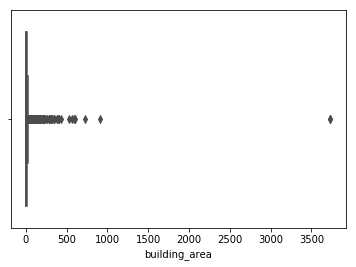

In [123]:
sns.boxplot(train_data['building_area'],  color='orange')

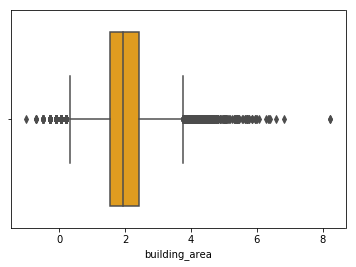

In [124]:
sns.boxplot(train_data['building_area'].apply(lambda x : np.log(x)),  color='orange')

# 經緯度

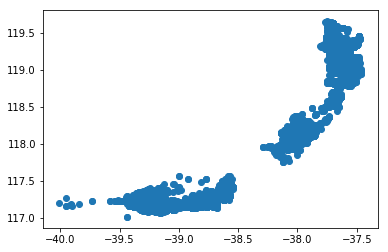

In [67]:
# 加入模型後效能下降一點
plt.scatter(train_data['lat'],train_data['lon'])

# 各鄉鎮市區人口數

In [72]:
train_data['town_population']

0        551480.0
1        139259.0
2        112397.0
3        238067.0
4        551480.0
           ...   
37682    222585.0
37683    230710.0
37684    551480.0
37685    288295.0
37686    551480.0
Name: town_population, Length: 37687, dtype: float64

# I類別

In [78]:
train_data['I_10'].value_counts()

0    37537
1      149
2        1
Name: I_10, dtype: int64

# 建物面積和土地面積的比例

In [149]:
train_data.loc[train_data['building_area']>train_data['land_area'], 'whether_more_than_land_area'] = 1
train_data.loc[train_data['building_area']<=train_data['land_area'], 'whether_more_than_land_area'] = 0

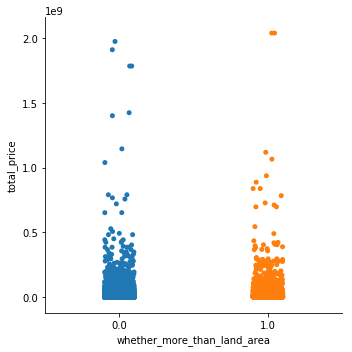

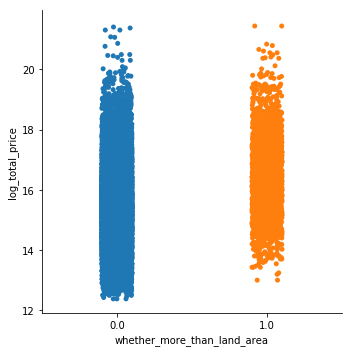

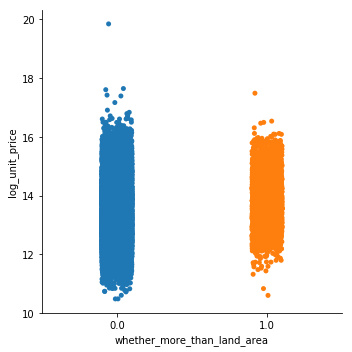

In [150]:
sns.catplot(x="whether_more_than_land_area", y="total_price", data=train_data)
sns.catplot(x="whether_more_than_land_area", y="log_total_price", data=train_data)
sns.catplot(x="whether_more_than_land_area", y="log_unit_price", data=train_data)

# 各里年收入中位數

In [143]:
city_income_median = train_data.groupby(by="city")['village_income_median'].median().reset_index().rename(columns={'village_income_median':'city_income_median'})
train_data = train_data.merge(city_income_median, on="city", how="left")
train_data.loc[train_data['village_income_median'].isnull(), 'village_income_median'] = train_data.loc[train_data['village_income_median'].isnull(), 'city_income_median']

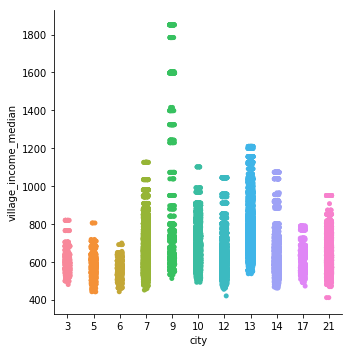

In [52]:
sns.catplot(x="city", y="village_income_median", data=train_data)

# 交易樓層高度比例

In [101]:
train_data['high_ratio'] = train_data['txn_floor'] / train_data['total_floor']
train_data['high_ratio'] = train_data['high_ratio'].fillna(0)

# 新地點

In [107]:
train_data['str_city'] = train_data['city'].apply(lambda x : str(x))
train_data['str_town'] = train_data['town'].apply(lambda x : str(x))
train_data['str_village'] = train_data['village'].apply(lambda x : str(x))
train_data['new_location'] = train_data['str_city'] + "_" + train_data['str_town'] + "_" + train_data['str_village']

# 計算點位密度

In [80]:
number_list = ["I", "II", "III", "IV", "V", "VI", "VII", "VIII", "IX", "X", "XI", "XII", "XIII", "XIV"]
radius_list = ["10", "50", "100", "250", "500", "1000"]
for number in number_list:
    for radius in radius_list:
        column_name = number + "_" + radius
        train_data[column_name] = train_data[column_name] / (np.pi*(int(radius)**2))

# 點位

In [93]:
features = []
distance_features = ['I_MIN', 'II_MIN', 'III_MIN', 'IV_MIN', 'V_MIN', 'VI_MIN', 'VII_MIN', 'VIII_MIN', 'IX_MIN', 'X_MIN', 
                    'XI_MIN', 'XII_MIN', 'XIII_MIN', 'XIV_MIN']

features.extend(distance_features)
features.append('total_price')

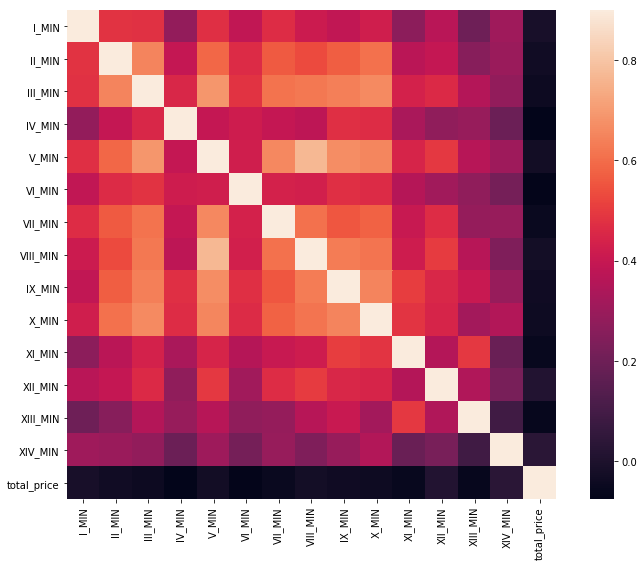

In [94]:
corrmat = train_data[features].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [135]:
train_data['house_year'] = (train_data['txn_dt'] - train_data['building_complete_dt'])/365
train_data['high_ratio'] = train_data['txn_floor'] / train_data['total_floor']
train_data['high_ratio'] = train_data['high_ratio'].fillna(0)

# 星期幾
train_data['weekday'] = train_data['txn_dt'] % 7
# 幾月
train_data['month'] = (train_data['txn_dt'] % 365 / 30.4167).apply(lambda x:np.floor(x))
# 季度
train_data['quarter'] = (train_data['txn_dt'] % 365 / 91.25).apply(lambda x:np.floor(x))

In [143]:
train_data['unit_price'] = train_data['total_price'] / train_data['building_area']
train_data['log_unit_price'] = np.log(train_data['total_price'] / train_data['building_area'])

In [164]:
np.corrcoef(train_data['new_village'], train_data['log_total_price'])

array([[ 1.        , -0.03462349],
       [-0.03462349,  1.        ]])

In [154]:
np.corrcoef(train_data['quarter'], train_data['unit_price'])

array([[1.       , 0.0051904],
       [0.0051904, 1.       ]])

In [159]:
train_data['str_city'] = train_data['city'].apply(lambda x : str(x))
train_data['str_town'] = train_data['town'].apply(lambda x : str(x))
train_data['str_village'] = train_data['village'].apply(lambda x : str(x))
train_data['new_village'] = train_data['str_city'] + "_" + train_data['str_town'] + "_" + train_data['str_village']
le = LabelEncoder()
train_data['new_village'] = le.fit_transform(train_data['new_village'])
train_data['new_town'] = train_data['str_city'] + "_" + train_data['str_town']
train_data['new_town'] = le.fit_transform(train_data['new_town'])

# 距離和總價之間的關係

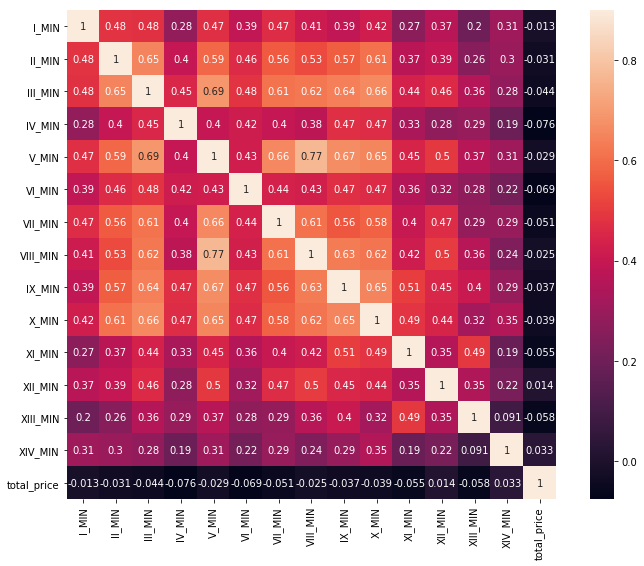

In [169]:
corr = train_data[['I_MIN', 'II_MIN', 'III_MIN', 'IV_MIN', 'V_MIN', 'VI_MIN', 'VII_MIN', 'VIII_MIN', 'IX_MIN', 'X_MIN', 
                    'XI_MIN', 'XII_MIN', 'XIII_MIN', 'XIV_MIN', 'total_price']].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.9, square=True, annot=True)

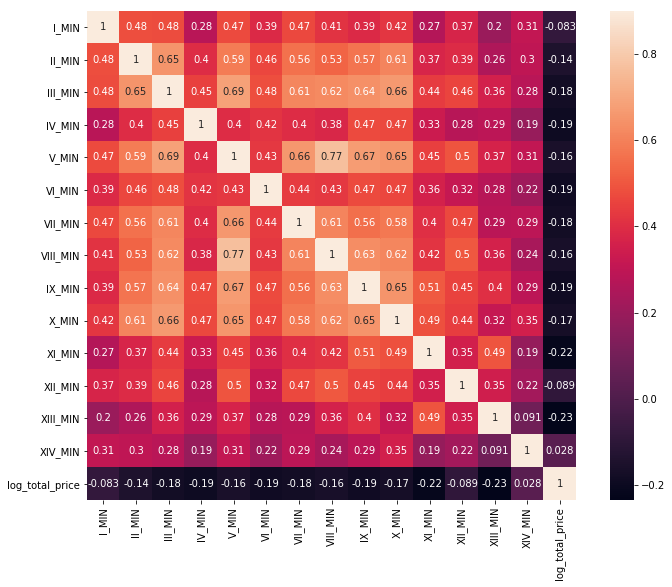

In [170]:
corr = train_data[['I_MIN', 'II_MIN', 'III_MIN', 'IV_MIN', 'V_MIN', 'VI_MIN', 'VII_MIN', 'VIII_MIN', 'IX_MIN', 'X_MIN', 
                    'XI_MIN', 'XII_MIN', 'XIII_MIN', 'XIV_MIN', 'log_total_price']].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.9, square=True, annot=True)

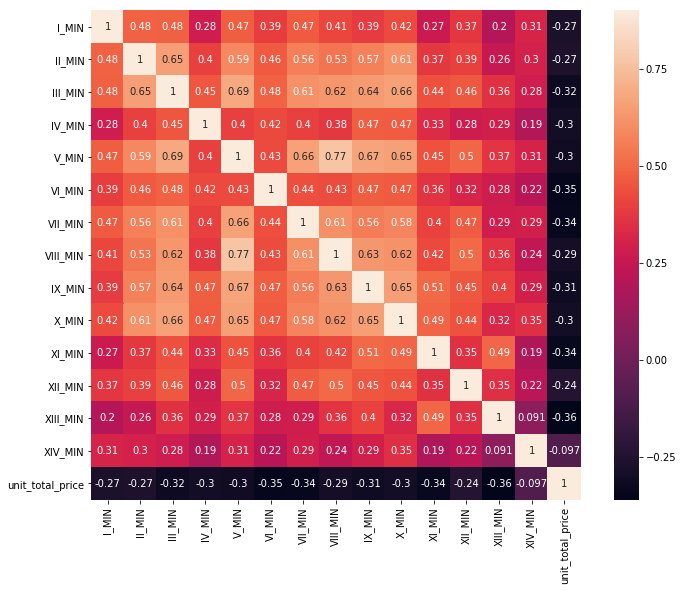

In [171]:
train_data['unit_total_price'] = np.log(train_data['total_price'] / train_data['building_area'])
corr = train_data[['I_MIN', 'II_MIN', 'III_MIN', 'IV_MIN', 'V_MIN', 'VI_MIN', 'VII_MIN', 'VIII_MIN', 'IX_MIN', 'X_MIN', 
                    'XI_MIN', 'XII_MIN', 'XIII_MIN', 'XIV_MIN', 'unit_total_price']].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.9, square=True, annot=True)

# 特定特徵與總價的關係

In [4]:
def standard_remove_outlier(train_data, feature_name):
    if feature_name == "land_area":
        log_feature = np.log(train_data[feature_name]).replace([np.inf, -np.inf], 0)
        feature_mean = log_feature.mean()
        feature_std = log_feature.std()
        train_data['standard_outlier'] = (log_feature - feature_mean) / feature_std
        drop_index = train_data.loc[(train_data['standard_outlier']>3)|(train_data['standard_outlier']<-3)].index
    else:
        log_feature = np.log(train_data[feature_name])
        feature_mean = log_feature.mean()
        feature_std = log_feature.std()
        train_data['standard_outlier'] = (log_feature - feature_mean) / feature_std
        drop_index = train_data.loc[(train_data['standard_outlier']>3)|(train_data['standard_outlier']<-3)].index
    return drop_index
train_data = pd.read_csv("train_avm.csv")

train_data = train_data.drop(standard_remove_outlier(train_data, 'total_price'),axis=0)
train_data = train_data.drop('standard_outlier',axis=1)
train_data = train_data.reset_index(drop=True)

train_data = train_data.drop(standard_remove_outlier(train_data, 'building_area'),axis=0)
train_data = train_data.drop('standard_outlier',axis=1)
train_data = train_data.reset_index(drop=True)

train_data = train_data.drop(standard_remove_outlier(train_data, 'land_area'),axis=0)
train_data = train_data.drop('standard_outlier',axis=1)
train_data = train_data.reset_index(drop=True)

test_data = pd.read_csv("test_avm.csv")
total_data = pd.concat([train_data,test_data],sort=False).reset_index(drop=True)

C:\Users\champ\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
train_data['house_year'] = (train_data['txn_dt'] - train_data['building_complete_dt'])/365
train_data['high_ratio'] = train_data['txn_floor'] / train_data['total_floor']
train_data['high_ratio'] = train_data['high_ratio'].fillna(0)
train_data['build_land_ratio'] = train_data['land_area'] / train_data['building_area']
train_data['every_floor_area'] = train_data['building_area'] / train_data['total_floor']
train_data['month'] = (train_data['txn_dt'] % 365 / 30.4167).apply(lambda x:np.floor(x))

train_data['str_city'] = train_data['city'].apply(lambda x : str(x))
train_data['str_town'] = train_data['town'].apply(lambda x : str(x))
train_data['str_village'] = train_data['village'].apply(lambda x : str(x))
train_data['new_village'] = train_data['str_city'] + "_" + train_data['str_town'] + "_" + train_data['str_village']
le = LabelEncoder()
train_data['new_village'] = le.fit_transform(train_data['new_village'])
train_data['new_town'] = train_data['str_city'] + "_" + train_data['str_town']
train_data['new_town'] = le.fit_transform(train_data['new_town'])

In [6]:
train_data['unit_total_price'] = np.log(train_data['total_price'] / train_data['building_area'])

[Text(0, 0.5, 'house_year'),
 Text(0, 1.5, 'high_ratio'),
 Text(0, 2.5, 'build_land_ratio'),
 Text(0, 3.5, 'every_floor_area'),
 Text(0, 4.5, 'unit_total_price')]

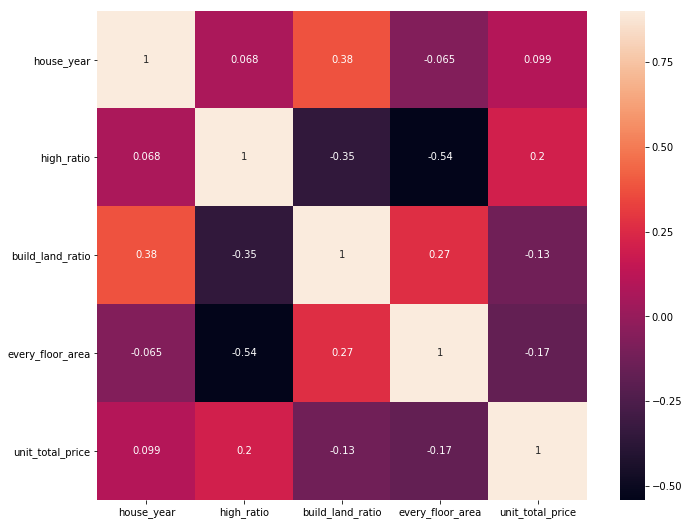

In [8]:
a = train_data[['house_year', 'high_ratio', 'build_land_ratio', 'every_floor_area', 'unit_total_price']].corr()
plt.subplots(figsize=(12,9))
g = sns.heatmap(a, vmax=0.9, square=True, annot=True)
g.set_yticklabels(g.get_yticklabels(), rotation = 0)

In [26]:
(np.exp(15)*2 - np.exp(15.1)*2) / (np.exp(15)*2)

-0.10517091807564716

In [9]:
len(test_data)

6301

In [10]:
test_data = pd.read_csv("test_avm.csv")

In [11]:
len(test_data)

6301